In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Hash rate
hr = pd.read_csv('c:/Users/Crews/Downloads/BCHAIN-HRATE.csv')
hr.rename(columns={"Value": "HR"}, inplace=True)
hr.drop(hr.tail(1732).index, inplace = True)
hr

,Date,HR
0,2021-04-26,1.336384e+08
1,2021-04-25,1.652896e+08
2,2021-04-24,1.699787e+08
3,2021-04-23,1.582560e+08
4,2021-04-22,1.676341e+08
...,...,...
2760,2013-10-05,1.900663e+03
2761,2013-10-04,1.560945e+03
2762,2013-10-03,1.538751e+03
2763,2013-10-02,1.538751e+03


In [3]:
#Number of active addressses
addr = pd.read_csv('c:/Users/Crews/Downloads/BCHAIN-NADDU.csv')
addr.rename(columns={"Value": "Addr"}, inplace=True)
addr.drop(addr.tail(1732).index, inplace = True)
addr

,Date,Addr
0,2021-04-26,677984.0
1,2021-04-25,585806.0
2,2021-04-24,695216.0
3,2021-04-23,794322.0
4,2021-04-22,757844.0
...,...,...
2760,2013-10-05,48783.0
2761,2013-10-04,55710.0
2762,2013-10-03,66403.0
2763,2013-10-02,72720.0


In [4]:
#Total number of bitcoins
total_btc = pd.read_csv('c:/Users/Crews/Downloads/BCHAIN-TOTBC.csv')
total_btc.rename(columns={"Value": "TotalBTC"}, inplace=True)
total_btc.drop(total_btc.tail(1732).index, inplace = True)
total_btc

,Date,TotalBTC
0,2021-04-26,18692075.00
1,2021-04-25,18691412.50
2,2021-04-24,18690537.50
3,2021-04-23,18689443.75
4,2021-04-22,18688787.50
...,...,...
2760,2013-10-05,11795325.00
2761,2013-10-04,11797800.00
2762,2013-10-03,11792525.00
2763,2013-10-02,11783800.00


In [6]:
#Total transactions fee
total_fee = pd.read_csv('c:/Users/Crews/Downloads/BCHAIN-TRFEE.csv')
total_fee.rename(columns={"Value": "TotalFee"}, inplace=True)
total_fee.drop(total_fee.tail(1732).index, inplace = True)
total_fee

,Date,TotalFee
0,2021-04-26,167.751607
1,2021-04-25,116.287343
2,2021-04-24,168.400895
3,2021-04-23,269.686753
4,2021-04-22,299.486614
...,...,...
2760,2013-10-05,26.062425
2761,2013-10-04,26.707452
2762,2013-10-03,33.539915
2763,2013-10-02,39.923033


In [45]:
#Bitcoin prices
btc_price = pd.read_csv('c:/Users/Crews/Downloads/BTCprice.csv')
btc_price.rename(columns={"Closing Price (USD)": "ClosingPrice"}, inplace=True)
btc_price

,Currency,Date,ClosingPrice,24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.654990,124.304660,124.751660,122.563490
1,BTC,2013-10-02,125.455000,123.654990,125.758500,123.633830
2,BTC,2013-10-03,108.584830,125.455000,125.665660,83.328330
3,BTC,2013-10-04,118.674660,108.584830,118.675000,107.058160
4,BTC,2013-10-05,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...,...
2760,BTC,2021-04-23,51965.059559,53830.823864,55471.076372,50500.731862
2761,BTC,2021-04-24,50669.144382,51714.073970,52111.185068,47467.912032
2762,BTC,2021-04-25,50733.769504,51217.172330,51253.442948,48932.158814
2763,BTC,2021-04-26,48542.952203,50177.237403,50668.659025,47105.593068


In [8]:
#Params DataFrame
data = pd.concat([hr.HR, addr.Addr, total_btc.TotalBTC, total_fee.TotalFee], axis = 1)
data

,HR,Addr,TotalBTC,TotalFee
0,1.336384e+08,677984.0,18692075.00,167.751607
1,1.652896e+08,585806.0,18691412.50,116.287343
2,1.699787e+08,695216.0,18690537.50,168.400895
3,1.582560e+08,794322.0,18689443.75,269.686753
4,1.676341e+08,757844.0,18688787.50,299.486614
...,...,...,...,...
2760,1.900663e+03,48783.0,11795325.00,26.062425
2761,1.560945e+03,55710.0,11797800.00,26.707452
2762,1.538751e+03,66403.0,11792525.00,33.539915
2763,1.538751e+03,72720.0,11783800.00,39.923033


In [9]:
#Data check
pd.isnull(data).any()

HR          False
Addr        False
TotalBTC    False
TotalFee    False
dtype: bool

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 2764
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        2765 non-null   float64
 1   Addr      2765 non-null   float64
 2   TotalBTC  2765 non-null   float64
 3   TotalFee  2765 non-null   float64
dtypes: float64(4)
memory usage: 108.0 KB


In [12]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

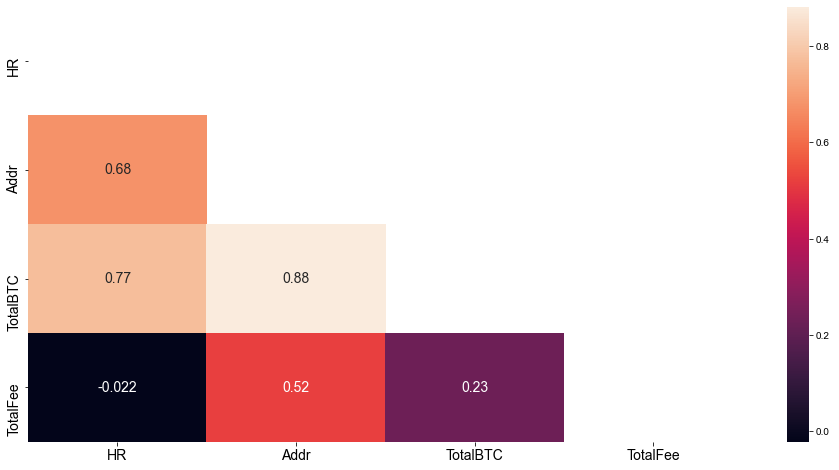

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [14]:
#training and test data split
prices = btc_price.ClosingPrice
features = data

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size = 0.1, random_state = 10)

In [15]:
#Creating predicting model
model = LinearRegression()
model.fit(X_train, y_train)

print("Training data r-squared:", model.score(X_train, y_train))
print("test data r-squared:", model.score(X_test, y_test))

print("Intercept:", model.intercept_)
pd.DataFrame(data = model.coef_, index = X_train.columns, columns = ["coef"])

Training data r-squared: 0.5711604334450531
test data r-squared: 0.5495186489559818
Intercept: 90430.45480715457


,coef
HR,0.000077
Addr,0.003408
TotalBTC,-0.005537
TotalFee,5.118030


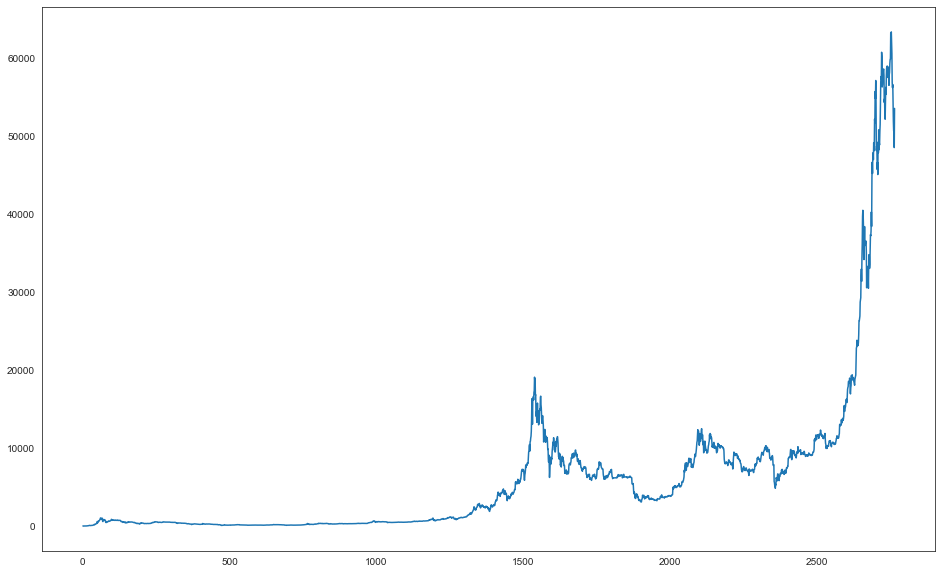

In [16]:
plt.figure(figsize=(16, 10))
btc_price['ClosingPrice'].plot()

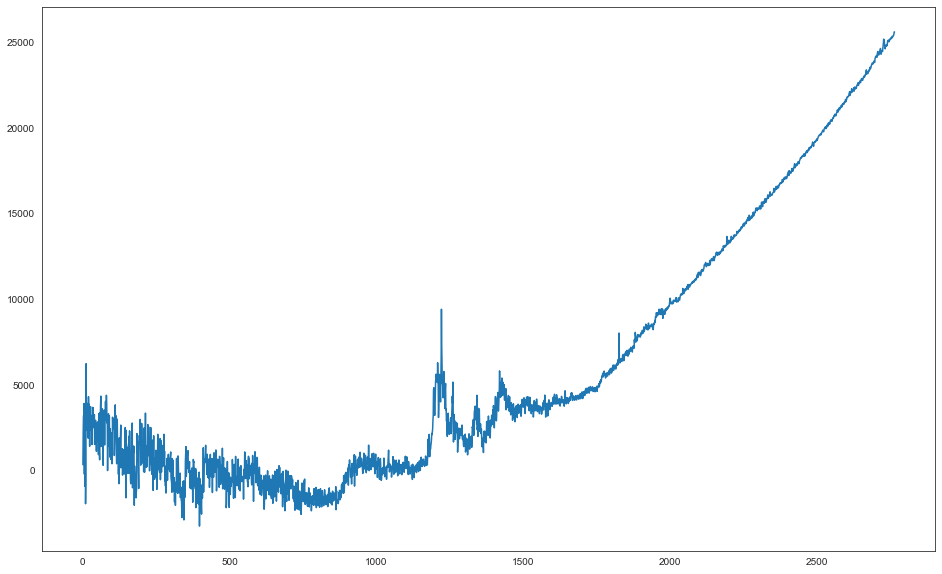

In [17]:
plt.figure(figsize=(16, 10))
plt.plot(model.predict(data))